In [58]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [46]:
tickers=['SPY','JPM','MS']    #S&P 500, JP Morgan and Morgan Stanley (equal weighted portfolio of JPM and MS)
df=pd.DataFrame()
for t in tickers:
    df[t]=yf.download(t,start='2020-01-01',end='2025-01-01',auto_adjust=False,progress=False)['Adj Close']
df.head()

,SPY,JPM,MS
Date,,,
2020-01-02,300.291534,120.733536,43.632938
2020-01-03,298.017700,119.140320,42.928638
2020-01-06,299.154633,119.045578,42.777718
2020-01-07,298.313446,117.021736,42.693871
2020-01-08,299.903381,117.934624,43.238873


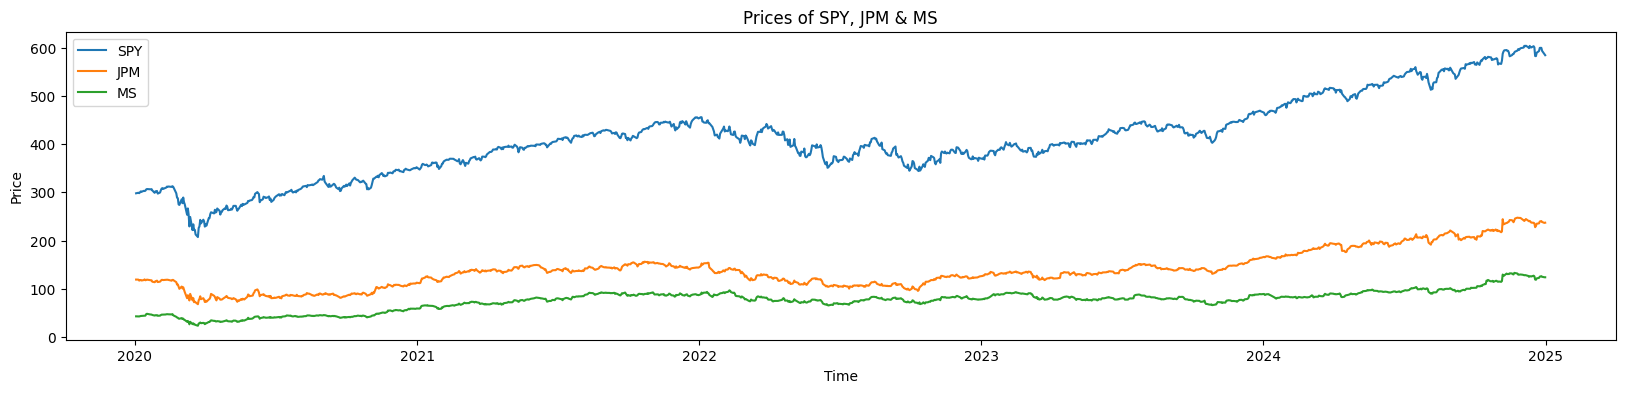

In [35]:
plt.figure(figsize=(20,4))
plt.plot(df['SPY'],label='SPY')
plt.plot(df['JPM'],label='JPM')
plt.plot(df['MS'],label='MS')
plt.title('Prices of SPY, JPM & MS')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [47]:
df['SPY Return']=np.log(df['SPY']/df['SPY'].shift(1))
df['JPM Return']=np.log(df['JPM']/df['JPM'].shift(1))
df['MS Return']=np.log(df['MS']/df['MS'].shift(1))
df['Portfolio Return']=((df['JPM Return'])*0.5)+((df['MS Return'])*0.5)
df['Gross Multiplier']=df['Portfolio Return']+1
df['Downside Return']=(df['Portfolio Return']**2).where(df['Portfolio Return']<0,0)    #Target Threshold: 0%
df=df.reset_index()
df['Date']=pd.to_datetime(df['Date'])
df=df.set_index('Date')
df=df.drop(index=pd.to_datetime('2020-01-02'))
df.head()

,SPY,JPM,MS,SPY Return,JPM Return,MS Return,Portfolio Return,Gross Multiplier,Downside Return
Date,,,,,,,,,
2020-01-03,298.017700,119.140320,42.928638,-0.007601,-0.013284,-0.016273,-0.014779,0.985221,0.000218
2020-01-06,299.154633,119.045578,42.777718,0.003808,-0.000796,-0.003522,-0.002159,0.997841,0.000005
2020-01-07,298.313446,117.021736,42.693871,-0.002816,-0.017147,-0.001962,-0.009554,0.990446,0.000091
2020-01-08,299.903381,117.934624,43.238873,0.005316,0.007771,0.012685,0.010228,1.010228,0.000000
2020-01-09,301.936859,118.365242,43.649708,0.006758,0.003645,0.009457,0.006551,1.006551,0.000000


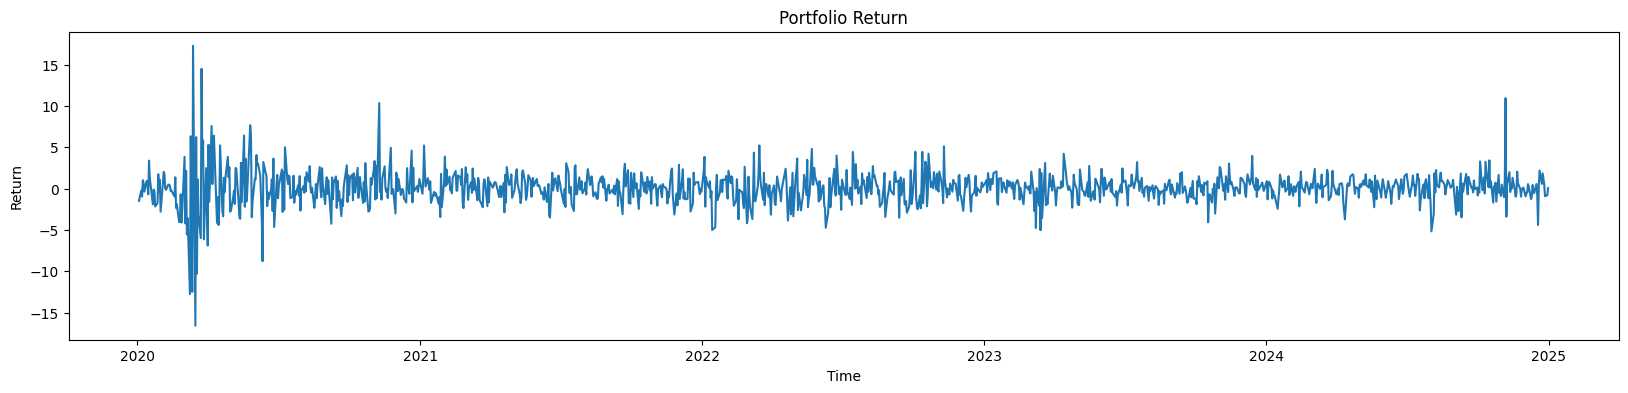

In [41]:
plt.figure(figsize=(20,4))
plt.plot(df['Portfolio Return']*100)
plt.title('Portfolio Return')
plt.xlabel('Time')
plt.ylabel('Return')
plt.show()

In [67]:
#Annualized Returns
spy_ret=df['SPY Return'].mean()*252
jpm_ret=df['JPM Return'].mean()*252
ms_ret=df['MS Return'].mean()*252
pf_ret=df['Portfolio Return'].mean()*252
print(f'SPY Return: {round(spy_ret*100,2)}%')
print(f'JPM Return: {round(jpm_ret*100,2)}%')
print(f'MS Return: {round(ms_ret*100,2)}%')
print(f'Portfolio Return: {round(pf_ret*100,2)}%')

SPY Return: 13.35%
JPM Return: 13.52%
MS Return: 20.92%
Portfolio Return: 17.22%


In [68]:
#Annualized Volatility (Standard Deviation)
spy_std=df['SPY Return'].std()*(252**0.5)
jpm_std=df['JPM Return'].std()*(252**0.5)
ms_std=df['MS Return'].std()*(252**0.5)
pf_std=df['Portfolio Return'].std()*(252**0.5)
ds_std=(df['Downside Return'].mean()**0.5)*(252**0.5)
print(f'SPY Volatility: {round(spy_std*100,2)}%')
print(f'JPM Volatility: {round(jpm_std*100,2)}%')
print(f'MS Volatility: {round(ms_std*100,2)}%')
print(f'Portfolio Volatility: {round(pf_std*100,2)}%')

SPY Volatility: 21.08%
JPM Volatility: 32.45%
MS Volatility: 35.55%
Portfolio Volatility: 32.33%


In [71]:
#Cumulative Portfolio Return
cum_ret=np.prod(np.array(df['Gross Multiplier']))-1
print(f'Cumulative Return: {round(cum_ret*100,2)}%')
#Correlation between stocks
corr_matrix=df[['JPM Return','MS Return']].corr()
corr=corr_matrix['JPM Return'].iloc[-1]
print(f'Correlation Between Securities: {round(corr*100,2)}%')
#Benchmark Correlation
spy_jpm_corr_matrix=df[['SPY Return','JPM Return']].corr()
spy_ms_corr_matrix=df[['SPY Return','MS Return']].corr()
spy_jpm_corr=spy_jpm_corr_matrix['JPM Return'].iloc[0]
print(f'Correlation Between SPY & JPM: {round(spy_jpm_corr*100,2)}%')
spy_ms_corr=spy_ms_corr_matrix['MS Return'].iloc[0]
print(f'Correlation Between SPY & MS: {round(spy_ms_corr*100,2)}%')

Cumulative Return: 81.85%
Correlation Between Securities: 80.85%
Correlation Between SPY & JPM: 70.99%
Correlation Between SPY & MS: 75.75%


                            OLS Regression Results                            
Dep. Variable:       Portfolio Return   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     1859.
Date:                Wed, 28 May 2025   Prob (F-statistic):          6.95e-250
Time:                        03:05:45   Log-Likelihood:                 3682.5
No. Observations:                1257   AIC:                            -7361.
Df Residuals:                    1255   BIC:                            -7351.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.595e-05      0.000      0.153      0.8

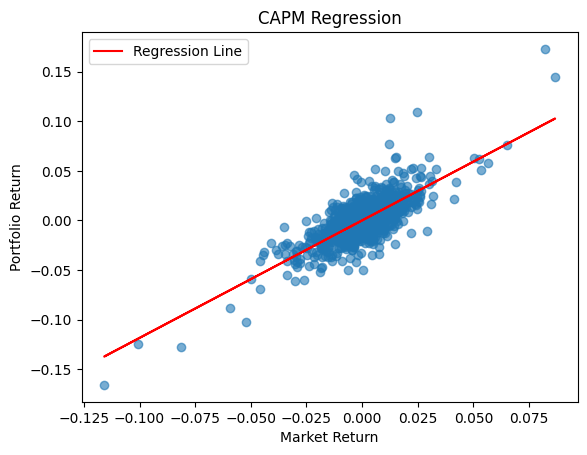

Alpha: 0.0
Beta: 1.18
R Squared: 0.6


In [73]:
#Linear Regression
X = df["SPY Return"]
X = sm.add_constant(X)
y = df["Portfolio Return"]
model = sm.OLS(y, X).fit()
print(model.summary())
alpha = model.params['const']
beta = model.params['SPY Return']
r_squared = model.rsquared
#Plot Linear Regression
plt.scatter(df["SPY Return"], df["Portfolio Return"], alpha=0.6)
plt.plot(df["SPY Return"], model.predict(X), color='red', label='Regression Line')
plt.xlabel("Market Return")
plt.ylabel("Portfolio Return")
plt.title("CAPM Regression")
plt.legend()
plt.show()
print(f'Alpha: {round(alpha,2)}')
print(f'Beta: {round(beta,2)}')
print(f'R Squared: {round(r_squared,2)}')

In [74]:
rf=0.0432   #Risk Free Rate
sharpe=(pf_ret-rf)/pf_std
sortino=(pf_ret-rf)/ds_std
treynor=(pf_ret-rf)/beta
print(f'Sharpe Ratio: {round(sharpe,2)}')
print(f'Sortino Ratio: {round(sortino,2)}')
print(f'Treynor Ratio: {round(treynor,2)}')

Sharpe Ratio: 0.4
Sortino Ratio: 0.58
Treynor Ratio: 0.11
